Predictive Modelling: German Credit Risk 
=========================================


## Summary

The goal of our analysis is to classify whether someone is a good or bad credit risk using attributes such as `Credit History`, `Duration`, and `Residence`. Our best-performing model is a Random Forest model. This model gave us an accuracy of 0.8 on unseen data, a decent result compared to the dummy model's accuracy of 0.7. We also obtained a precision score of 0.8, a recall score of 0.95, and F1 Score of 0.87. Our model performs decently well in terms of identifying people who are a good credit risk. However, if this model is to have a hand in real-world decision-making, precision should be improved to minimize classifying poor credit risks as good credit risks (false positives). In addition, more research should be done to ensure the model produces fair and equitable recommendations.

## Introduction

First, let's define good and bad credit; bad credit is a person’s history and future likelihood of not paying credit card bills on time and good credit is the opposite. Understanding and predicting credit risk is crucial for businesses in the finance sector, as supported by articles from the Journal of Applied Statistics and McKinsey & Company. “Credit risk modelling, namely its component Probability of Default (PD), is very helpful in the consumer credit loan grant decision.” (Costa e Silva et al., 2020). “At an average commercial bank, credit-related assets produce about 40 percent of total revenues; credit-related costs, including provisions and write-offs, account for a significant fraction of expenses” (Goraieb et al., n.d.). With this in mind, our data science project will develop a predictive model aimed at discerning good from bad credit risk.

Our key question: How can we predict individuals with good or bad credit risk using relevant and representative input features

The [Statlog (German Credit Data)](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data) dataset, sourced from UCI’s Machine Learning Repository, can be used for classifying individuals as good or bad credit risks based on a variety of attributes. A cost matrix is required for evaluation, where misclassification costs are outlined. The cost matrix indicates that it is worse to classify a customer as good when they are bad, compared to classifying a customer as bad when they are good. The dataset contains 1000 instances with 20 features. Each feature has a different role, type, and demographic information, summarized as follows:

| Feature                                                         | Type        | Description                                                                                                       |
|-----------------------------------------------------------------|-------------|-------------------------------------------------------------------------------------------------------------------|
| Target Variable (Credit Risk)                                   | Binary      | Classifies individuals as either good (= 1) or bad (= 2) credit risks                                            |
| Status of existing checking account (Attribute1)                | Categorical | Indicates the status of the existing checking account in 4 categories, such as the balance amount or absence of a checking account |
| Duration (Attribute2)                                           | Integer     | Represents the duration of credit in months                                                                      |
| Credit history (Attribute3)                                     | Categorical | Describes the credit history of individuals in 3 categories, including whether credits were paid back duly or if there were payment delays |
| Purpose (Attribute4)                                            | Categorical | Specifies the purpose of the credit in 11 categories, like for a car purchase, furniture, education, or business, etc. |
| Credit amount (Attribute5)                                      | Integer     | Denotes the amount of credit requested                                                                           |
| Savings account/bonds (Attribute6)                              | Categorical | Indicates the status of savings accounts or bonds in categorical brackets of DEM currency                        |
| Present employment since (Attribute7)                           | Categorical | Shows the duration of present employment                                                                         |
| Installment rate (Attribute8)                                   | Integer     | Represents the installment rate in terms of a percentage of disposable income                                     |
| Personal status and sex (Attribute9)                            | Categorical | Provides information about personal status and sex                                                               |
| Other debtors/guarantors (Attribute10)                          | Categorical | Indicates the presence of other debtors or guarantors                                                            |
| Present residence since (Attribute11)                           | Integer     | Denotes the duration of present residence                                                                        |
| Property (Attribute12)                                          | Categorical | Describes the type of property owned                                                                             |
| Age in years (Attribute13)                                      | Integer     | Represents the age of individuals                                                                                |
| Other installment plans (Attribute14)                           | Categorical | Specifies other installment plans held by individuals                                                            |
| Housing (Attribute15)                                           | Categorical | Indicates the housing status                                                                                     |
| Number of existing credits at this bank (Attribute16)           | Integer     | Denotes the number of existing credits at this bank                                                              |
| Job (Attribute17)                                               | Categorical | Describes the job status of individuals                                                                          |
| Number of people being liable to provide maintenance for (Attribute18) | Integer | Represents the number of dependents                                                                              |
| Telephone (Attribute19)                                         | Categorical | Indicates the presence of a telephone registered under the customer's name                                        |
| Foreign worker (Attribute20)                                    | Categorical | Specifies whether the individual is a foreign worker                                                            |

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline


from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## Analysis

In [2]:
# Load the dataset
file_path = '../data/german.csv'
df = pd.read_csv(file_path)
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


> <center><b><i>Table 1: Original Dataset</i></b></center>


The Dataset contains 21 columns of categorical and numerical data. The last column can be identified as the target variable. The column names will be renamed for easier understanding using the provided descriptions.

In [3]:
# Column names 
df.columns = ["Status", "Duration", "Credit history", 
                "Purpose", "Credit amount", "Savings account", "Employement", 
                "Rate", "Personal status", 
                "Guarantors", "Residence", "Property", 
                "Age", "Installment", "Housing", "Existing credits", 
                "Job", "Liable people", 
                "Telephone", "Foreign worker", "Credit risk"]
df.head()

,Status,Duration,Credit history,Purpose,Credit amount,Savings account,Employement,Rate,Personal status,Guarantors,...,Property,Age,Installment,Housing,Existing credits,Job,Liable people,Telephone,Foreign worker,Credit risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


> <center><b><i>Table 2: Dataset with Descriptive Titles</i></b></center>

In [4]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Status            1000 non-null   object
 1   Duration          1000 non-null   int64 
 2   Credit history    1000 non-null   object
 3   Purpose           1000 non-null   object
 4   Credit amount     1000 non-null   int64 
 5   Savings account   1000 non-null   object
 6   Employement       1000 non-null   object
 7   Rate              1000 non-null   int64 
 8   Personal status   1000 non-null   object
 9   Guarantors        1000 non-null   object
 10  Residence         1000 non-null   int64 
 11  Property          1000 non-null   object
 12  Age               1000 non-null   int64 
 13  Installment       1000 non-null   object
 14  Housing           1000 non-null   object
 15  Existing credits  1000 non-null   int64 
 16  Job               1000 non-null   object
 17  Liable people  

NoneType

The data does not contain any null value there for no imputation is required.

In [5]:
{column: df[column].nunique() for column in df.columns}

{'Status': 4,
 'Duration': 33,
 'Credit history': 5,
 'Purpose': 10,
 'Credit amount': 921,
 'Savings account': 5,
 'Employement': 5,
 'Rate': 4,
 'Personal status': 4,
 'Guarantors': 3,
 'Residence': 4,
 'Property': 4,
 'Age': 53,
 'Installment': 3,
 'Housing': 3,
 'Existing credits': 4,
 'Job': 4,
 'Liable people': 2,
 'Telephone': 2,
 'Foreign worker': 2,
 'Credit risk': 2}

In [6]:
df.describe()

,Duration,Credit amount,Rate,Residence,Age,Existing credits,Liable people,Credit risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


> <center><b><i>Table 3: Descriptive statistics of the data</i></b></center>


The numerical data will then be inspected to check is scaling is required.

## Splitting Data 

In [7]:
# Splitting the dataset into training and testing sets
X = df.drop("Credit risk", axis=1)  
y = df["Credit risk"]  # Target variable



In [8]:
# Applying the preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the splits
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((800, 20), (200, 20)), ((800,), (200,)))

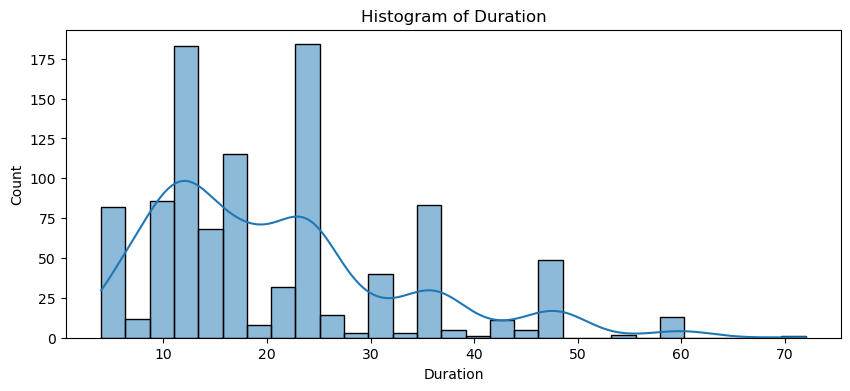

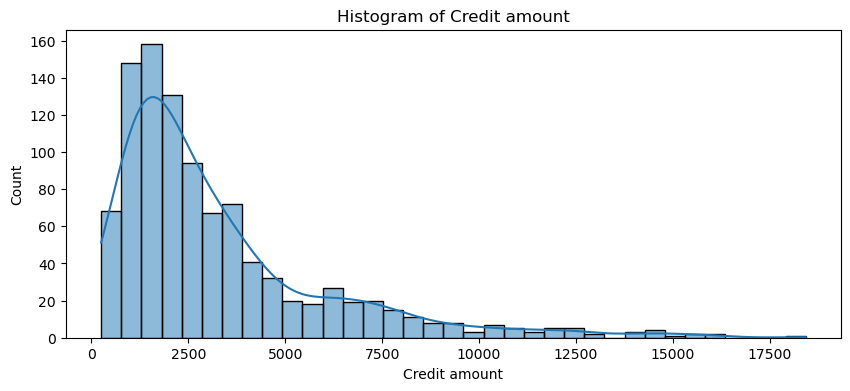

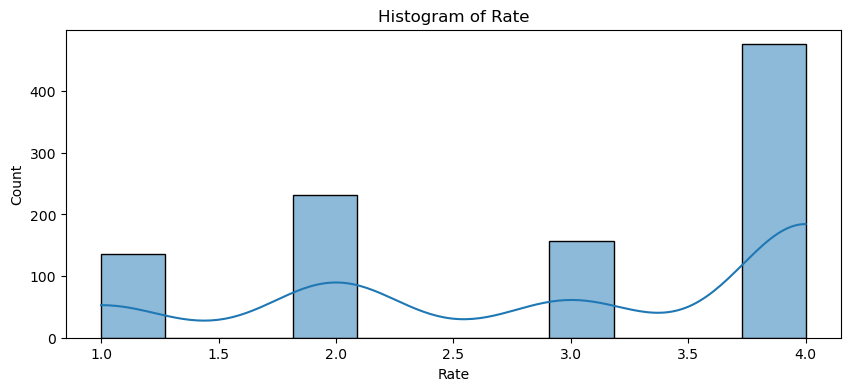

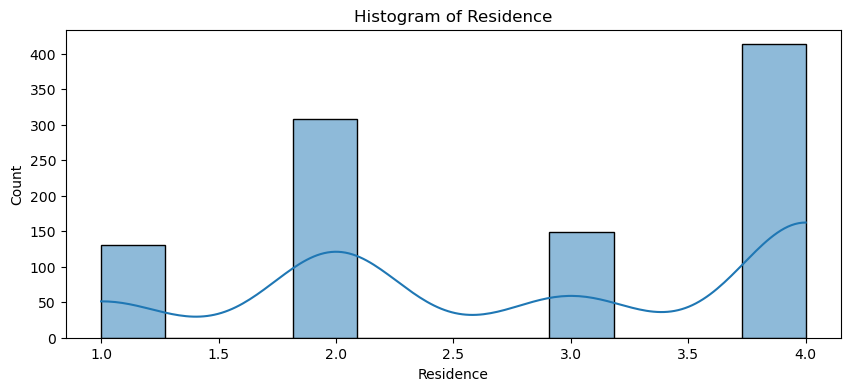

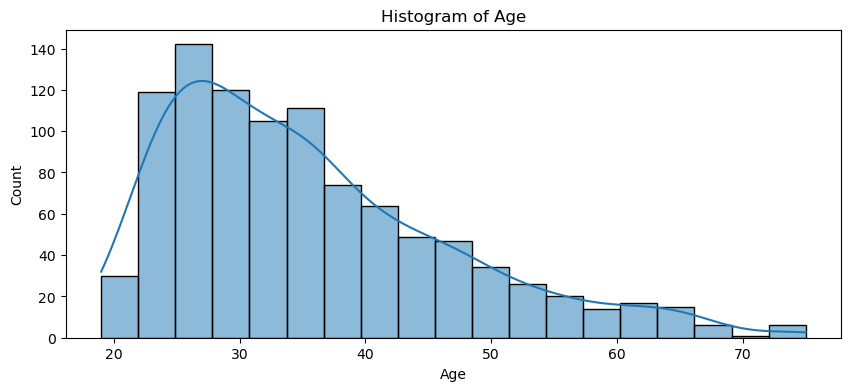

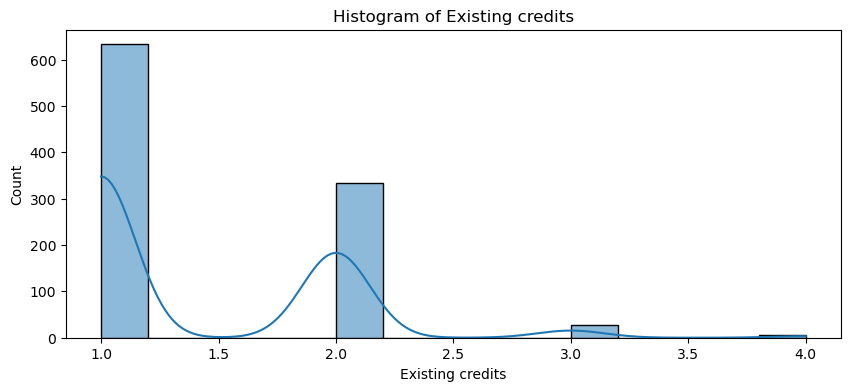

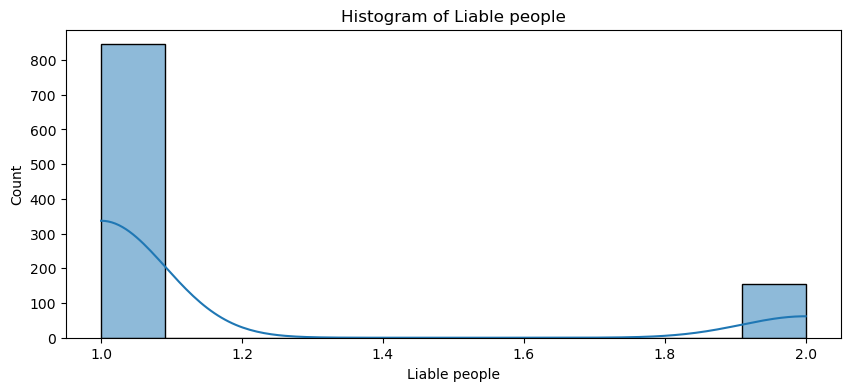

In [9]:
# Histograms for numerical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

> <center><b><i>Figure 1: Histograms of numerical columns</i></b></center>

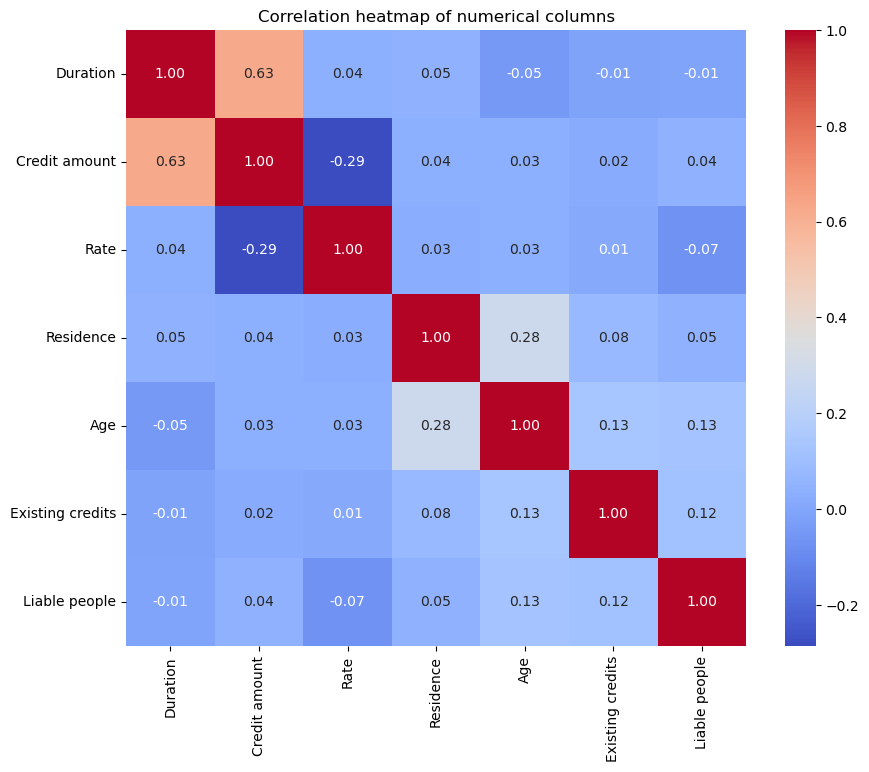

In [10]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(X_train[numerical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation heatmap of numerical columns')
plt.show()

> <center><b><i>Figure 2: Correlation heatmap of numerical columns</i></b></center>

The correlation does not display any high correlation between two given variables so no manipulation is required. Thus, the data can be scaled and fit prepared for the model. Column transformer will be used to scale the numerical data as well using one hot encoder for the cateogrical data.

### Preprocessing

In [11]:
# Identifying numeric and categorical columns
numeric_features = ["Duration", "Credit amount", "Age", "Rate", "Existing credits", "Liable people"]
categorical_features = ["Status", "Credit history", "Purpose", "Savings account", "Employement", 
                        "Personal status", "Guarantors", "Residence", "Property", "Installment", 
                        "Housing", "Job", "Telephone", "Foreign worker"]

# Creating transformers for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Applying the transformations
X_train_transformed = preprocessor.fit_transform(X_train)

X_test_transformed = preprocessor.transform(X_test)

# Shape
X_train_transformed.shape

(800, 64)

Viewing the data_prepared data as a dataframe

In [12]:
column_names = (
    numeric_features  
    + preprocessor.named_transformers_["cat"].get_feature_names_out().tolist()
)

In [13]:
pd.DataFrame(X_train_transformed, columns=column_names)

,Duration,Credit amount,Age,Rate,Existing credits,Liable people,Status_A11,Status_A12,Status_A13,Status_A14,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign worker_A201,Foreign worker_A202
0,3.297082,1.199912,2.406187,0.031196,1.017777,-0.409736,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-0.008051,-0.359630,-0.224364,-0.860109,-0.710931,-0.409736,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.279256,-0.733547,1.266282,-0.860109,-0.710931,-0.409736,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.008051,0.567050,-0.575104,-1.751413,1.017777,-0.409736,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,-0.770774,-0.854388,-1.276585,0.922500,-0.710931,-0.409736,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.262292,1.069404,0.301746,-0.860109,1.017777,2.440599,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
796,-0.262292,-0.241206,-0.312049,0.922500,-0.710931,-0.409736,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
797,0.246190,0.843603,-0.750474,0.922500,1.017777,-0.409736,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
798,-0.770774,-0.647923,-0.925844,-0.860109,-0.710931,-0.409736,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


> <center><b><i>Table 4: Transformed Data</i></b></center>

The data will be split into a training and testing set where the Credit Risk will be set as the target variable for the supervised model

### Dummy Classifier

Lets first try the `Dummy Classifier`

In [14]:
#Creating a results dictionary
results = {}

In [15]:
#Create a dummy classifier object
dummy = DummyClassifier(random_state = 69)

#Assessing dummy classifier scores
scores = cross_validate(dummy, X_train_transformed, y_train, return_train_score=True)
scores_df = pd.DataFrame(scores)
scores_df

,fit_time,score_time,test_score,train_score
0,0.001772,0.002562,0.69375,0.700000
1,0.002125,0.001725,0.70000,0.698438
2,0.001033,0.001190,0.70000,0.698438
3,0.001082,0.002003,0.70000,0.698438
4,0.000903,0.001239,0.70000,0.698438


> <center><b><i>Table 5: Cross-Validation results for Dummy Classifier</i></b></center>

Model Result:

In [16]:
#Creating model score dataframe
mean_scores = scores_df.mean()

results["Dummy"] = mean_scores

pd.DataFrame(results).T


,fit_time,score_time,test_score,train_score
Dummy,0.001383,0.001744,0.69875,0.69875


> <center><b><i>Table 6: Mean Cross-Validation results for Dummy Classifier</i></b></center>

This DummyClassifier scores act as our baseline model to test model performance. 

Now we will different models.

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

#Creating a LogisticRegression object
lr = LogisticRegression(random_state = 69)

#Assessing model scores
scores = cross_validate(lr, X_train_transformed, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.016290,0.001520,0.74375,0.784375
1,0.013512,0.001028,0.74375,0.784375
2,0.013184,0.001036,0.68750,0.809375
3,0.012933,0.001105,0.80625,0.768750
4,0.011402,0.001281,0.71250,0.781250


> <center><b><i>Table 7: Cross-Validation results for Logistic Regression</i></b></center>

Logistic regression seems to be doing better than dummy classifier. But note that there is a lot of variation in the scores.

In [18]:
# Hyperparameter optimization

scores_dict = {
    "C": 10.0 ** np.arange(-4, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}
for C in scores_dict["C"]:
    lr = LogisticRegression(C=C, random_state = 69)
    scores = cross_validate(lr, X_train_transformed, y_train, return_train_score=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())

results_df = pd.DataFrame(scores_dict)
results_df

,C,mean_train_scores,mean_cv_scores
0,0.0001,0.698750,0.69875
1,0.0010,0.698750,0.69875
2,0.0100,0.718750,0.71250
3,0.1000,0.783750,0.74250
4,1.0000,0.785625,0.73875
5,10.0000,0.788438,0.73500
6,100.0000,0.787500,0.73250
7,1000.0000,0.788125,0.73375
8,10000.0000,0.788125,0.73250
9,100000.0000,0.788125,0.73375


> <center><b><i>Table 8: Cross-Validation results for Logistic Regression with varying regularization strengths</i></b></center>

In [19]:
# Extracting the best parameter
highest_mean_cv_score_index = results_df['mean_cv_scores'].idxmax()
highest_mean_cv_score_c_value = results_df.loc[highest_mean_cv_score_index, 'C']

print("C =", highest_mean_cv_score_c_value)


C = 0.1


In [20]:
# Creating a LogisticRegression object with the best parameter and assessing scores
lr_parameterised = LogisticRegression(C = 0.1, random_state = 69)
scores_updated = cross_validate(lr_parameterised, X_train_transformed, y_train, return_train_score=True)
pd.DataFrame(scores_updated)

,fit_time,score_time,test_score,train_score
0,0.014227,0.001475,0.73125,0.784375
1,0.010526,0.001235,0.73125,0.790625
2,0.007116,0.001701,0.70625,0.801562
3,0.008017,0.000970,0.81875,0.768750
4,0.007902,0.001089,0.72500,0.773438


> <center><b><i>Table 9: Cross-Validation results for Parameterized Logistic Regression</i></b></center>

After hyperparameter optimization the test_scores have increased indicating better model performance.

### Fitting the model

Since the hyperparameter optimization is done, now lets fit the model to our training data

In [21]:
#Fitting the model
lr_parameterised.fit(X_train_transformed,y_train)

LogisticRegression(C=0.1, random_state=69)

### Accessing learned parameters

In [22]:
#Accessing the coefficients of the variables. 
pd.DataFrame({"columns":column_names, "coefs":list(lr_parameterised.coef_[0])}).sort_values("coefs")

,columns,coefs
9,Status_A14,-0.700143
14,Credit history_A34,-0.526692
16,Purpose_A41,-0.455694
37,Personal status_A93,-0.329245
52,Installment_A143,-0.298289
...,...,...
25,Savings account_A61,0.315612
10,Credit history_A30,0.342541
22,Purpose_A46,0.349091
15,Purpose_A40,0.444806


> <center><b><i>Table 10: Learned Parameters</i></b></center>

- The table displays coefficients assigned to various features by the logistic regression model.
- Negative coefficients (e.g., Status_A14, Credit history_A34) indicate a negative impact on the target variable (better credit risk), while positive coefficients (e.g., Purpose_A40, Status_A11) indicate a positive impact (poorer credit risk).
- The magnitude of the coefficients reflects the strength of the relationship between each feature and the target variable, with larger absolute values suggesting a more significant influence on the model's predictions.

## ROC Curve

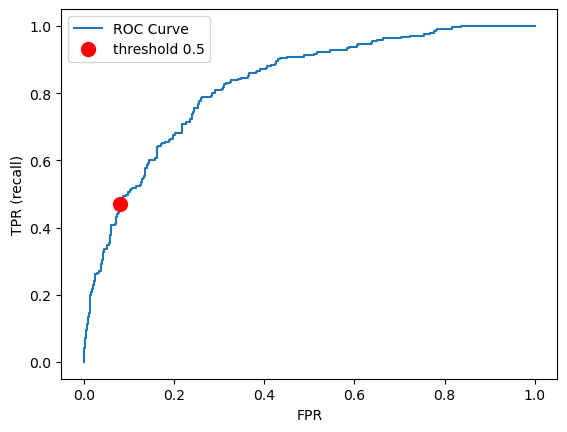

In [23]:
from sklearn.metrics import roc_curve

# Map label values from 1 and 2 to 0 and 1
y_train_binary = y_train.copy()  # Create a copy to avoid modifying the original array
y_train_binary[y_train_binary == 1] = 0
y_train_binary[y_train_binary == 2] = 1

#ROC curve plot
fpr, tpr, thresholds = roc_curve(y_train_binary, lr_parameterised.predict_proba(X_train_transformed)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

> <center><b><i>Figure 3: ROC Curve</i></b></center>

The above graph is a plot of our true positive rate/recall against false positive rate. For our case, a False Positive is when we predict someone to be a bad credit risk, when in reality they are a good credit risk. Therefore, we want to minimize False Positives while still maintaing a decent recall rate. The default predict-proba threshhold of 0.5 is our choice for balancing these two goals as it keeps the False Positive Rate quite low.

Model Performances: 

In [24]:
# Creating a dataframe of the results of different models

results["Logistic Regression"] = pd.DataFrame(scores_updated).mean()

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.001383,0.001744,0.69875,0.69875
Logistic Regression,0.009557,0.001294,0.74250,0.78375



> <center><b><i>Table 11: Comparison of Model Performances: Dummy vs. Logistic Regression</i></b></center>

### Random Forest Model

Logistic regression is a linear model and may not capture complex relationships between features. To address this limitation, we introduced a random forest model to harness its capacity for capturing intricate feature interactions and handling non-linear relationships. Random forests are an ensemble learning method that constructs multiple decision trees to improve predictive performance and reduce overfitting. 

In [25]:
X_train_df = pd.DataFrame(X_train_transformed, columns=column_names)
X_train_df

,Duration,Credit amount,Age,Rate,Existing credits,Liable people,Status_A11,Status_A12,Status_A13,Status_A14,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign worker_A201,Foreign worker_A202
0,3.297082,1.199912,2.406187,0.031196,1.017777,-0.409736,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-0.008051,-0.359630,-0.224364,-0.860109,-0.710931,-0.409736,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.279256,-0.733547,1.266282,-0.860109,-0.710931,-0.409736,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.008051,0.567050,-0.575104,-1.751413,1.017777,-0.409736,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,-0.770774,-0.854388,-1.276585,0.922500,-0.710931,-0.409736,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.262292,1.069404,0.301746,-0.860109,1.017777,2.440599,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
796,-0.262292,-0.241206,-0.312049,0.922500,-0.710931,-0.409736,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
797,0.246190,0.843603,-0.750474,0.922500,1.017777,-0.409736,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
798,-0.770774,-0.647923,-0.925844,-0.860109,-0.710931,-0.409736,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


> <center><b><i>Table 12: Random Forest Training Set</i></b></center>

In [26]:
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier object and assessing model scores
rf_classifier = RandomForestClassifier(
        n_jobs=-1,
        random_state=123)

scores_rf =cross_validate(rf_classifier, X_train_transformed, y_train, return_train_score=True)

pd.DataFrame(scores_rf)

,fit_time,score_time,test_score,train_score
0,0.558177,0.065192,0.73750,1.0
1,0.491181,0.059345,0.73750,1.0
2,0.401480,0.043493,0.75000,1.0
3,0.327762,0.043164,0.80625,1.0
4,0.349869,0.050186,0.73750,1.0


> <center><b><i>Table 13: Cross-Validation resutls for Random Forest</i></b></center>

### Hyperparameter Optimization

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],  # Number of trees in the forest
    'max_depth': [1, 5, 10, 15, 20],    # Maximum depth of the trees
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


Now create and fit the model with the best hyperparameters we got

In [28]:
# Creating the model with best hyperparameter and assessing scores
rf_parameterised = RandomForestClassifier(
            n_estimators = best_params['n_estimators'],
            max_depth = best_params['max_depth'],
            n_jobs=-1,
            random_state=123)

scores_rf_parameterised =cross_validate(rf_parameterised, X_train_transformed, y_train, return_train_score=True)
pd.DataFrame(scores_rf_parameterised)

,fit_time,score_time,test_score,train_score
0,0.400875,0.044308,0.74375,1.0
1,0.322498,0.042207,0.74375,1.0
2,0.331487,0.043252,0.74375,1.0
3,0.336130,0.049574,0.79375,1.0
4,0.331653,0.044636,0.75000,1.0


> <center><b><i>Table 14: Cross-Validation results for Parameterized Random Forest</i></b></center>

Lets fit the data on the train set

In [29]:
#Fit the model 
rf_parameterised.fit(X_train_transformed, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=123)

### Prediction and metric scores

In [37]:
test_results = {}
# Predict on the test set
y_pred = rf_parameterised.predict(X_test_transformed)

# Evaluate the model performance on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

test_results['Random Forest'] = [accuracy,precision,recall,f1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

test_results = pd.DataFrame(test_results)
test_results.index = ['Accuracy', 'Precision','Recall','F1 Score']
test_results

Accuracy: 0.775
Precision: 0.7926829268292683
Recall: 0.9219858156028369
F1 Score: 0.8524590163934426


,Random Forest
Accuracy,0.775000
Precision,0.792683
Recall,0.921986
F1 Score,0.852459


- Accuracy (0.8): The proportion of correctly classified instances out of the total instances in the test set.
- Precision (0.802): The ratio of correctly predicted positive observations to the total predicted positives. It indicates the model's ability to correctly identify positive instances.
- Recall (0.950): The ratio of correctly predicted positive observations to all actual positives. It shows the model's ability to capture all positive instances.
- F1 Score (0.870): The harmonic mean of precision and recall. It provides a balance between precision and recall, especially useful when dealing with imbalanced classes.

Overall, these metrics suggest that the Random Forest classifier performs well on the test set, with relatively high accuracy, precision, recall, and F1 score. It correctly classifies a majority of instances while maintaining a good balance between false positives and false negatives.

### Visualizing the tree

We can look at different trees created by random forest.

In [38]:
#Extracting feature names
feature_names = (
  X_train_df.columns.tolist()
)
feature_names[:10]

['Duration',
 'Credit amount',
 'Age',
 'Rate',
 'Existing credits',
 'Liable people',
 'Status_A11',
 'Status_A12',
 'Status_A13',
 'Status_A14']

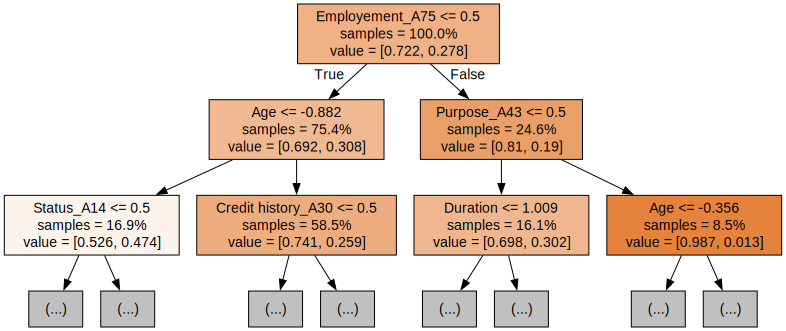

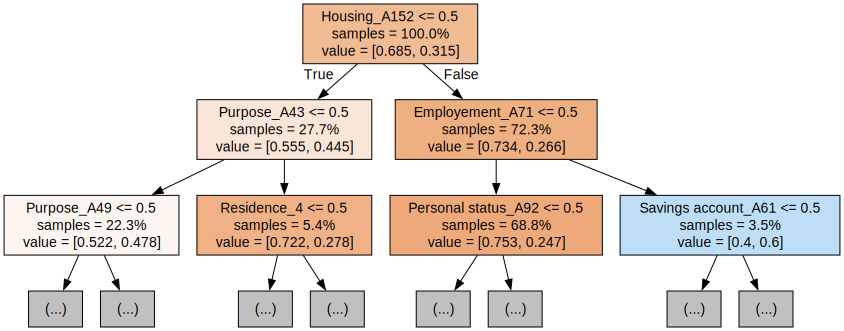

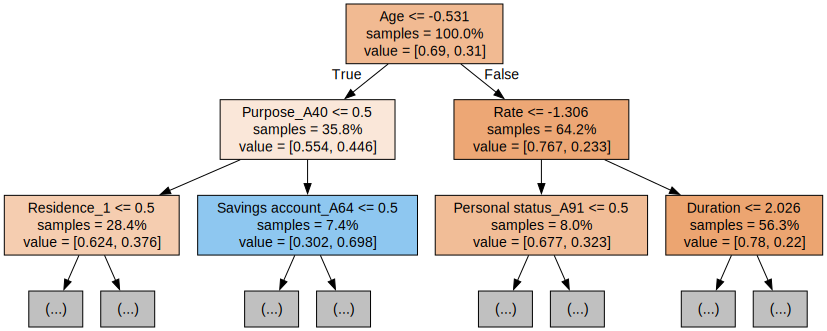

In [39]:
#Create 3 trees for visualization

for i in range(3):
    tree = rf_parameterised.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_names,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

> <center><b><i>Figure 4: Visualization of Random Forest Tree</i></b></center>


### Model Performances

In [40]:
#Assessing model performance of different models
results["Random Forest"] = pd.DataFrame(scores_rf_parameterised).mean()

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.001383,0.001744,0.69875,0.69875
Logistic Regression,0.009557,0.001294,0.74250,0.78375
Random Forest,0.344529,0.044796,0.75500,1.00000


> <center><b><i>Table 15: Summary of each model perfomance</i></b></center>

Both the models are performing better than our baseline model.
- **Logistic Regression**: It has moderate training and prediction times and achieves a decent accuracy on the test set, indicating reasonable performance without overfitting.
- **Random Forest**: It takes significantly longer to train compared to logistic regression but achieves a slightly higher accuracy on the test set. However, there's a large discrepancy between the training and test scores, suggesting potential overfitting.

## Discussion

Our aim is to classify whether someone is a good or bad credit risk. First we used the dummy classifier which produced an accuracy of about 0.7 and we used this as a benchmark. We then employed logistic regression to improve on the dummy model's performance. The accuracy improved from 0.7 to 0.79. Three variables that strongly pushed the prediction in the positive direction (bad credit) are Status_A11 (< 0 Deutsche mark), Purpose_A40 (purpose is new car), and Purpose_A46 (purpose is education). Three variables that strongly pushed the prediction in the negative direction (good credit) are Status_A14 (no checking account), Credit history_A34 (other credits existing (not at this bank)), and Purpose_A41 (purpose is used car). Finally, we used a Random Forest model which improved on accuracy, recall, and F1-score compared to the Logistic Regression model. Both models had a decent precision value of around 0.8 which is important as business often want to avoid identifying people as good creditors when that is not the case. We would recommend using the Random Forest model due to its improved F1-score and accuracy.

It is unsurprising that we were able to improve on the Dummy classifier with logistic regression and random forest models as data such as credit status, purpose, and history seems fairly informative and somewhat linearly related to one's credit risk. It is also unsurprising that having negative DM (German currency) would indicate a bad credit risk. One surprise is that our model seems to think having no checking account is an indicator of a good credit risk- this is not very intuitive.

This model could potentially be used by banks to determine who they should loan money to since analyzing credit risks is important to banks (Dobby & Vossos, 2024). Even though there are potential benefits to using this logistic regression model, we should keep in mind negative impacts it could have. Using a model such as the one we created could result in un-intentional discrimination. For example, `Age` is an attribute in our data. Our model has the coefficient -0.21 for Age indicating a larger age value will have a better credit prediction, holding other variables constant. If our model was used to determine who should get a bank loan, there would be risk of age discrimination which is unethical and illegal (Personal Characteristics, Grounds of Discrimination Protected in the BC Human Rights Code - BC Human Rights Tribunal, 2023)
. 

While we only explored a linear regression model and random forest model, it would be interesting to see if gradient-boosted classifiers have improved accuracy and precision. If we used more complex classifiers such as lightLGBM, we would benefit from using SHAP graphs to understand how the model is making predictions generally, and on an individual basis. In addition, research could be done on how to prevent our model from discriminating based on age, gender, etc. as sometimes simply removing attributes does not lessen discrimination.

## References

Costa e Silva, E., Lopes, I. C., Correia, A., & Faria, S. (2020). A logistic regression model for consumer default risk. Journal of Applied Statistics, 47(13-15), 2879–2894. https://doi.org/10.1080/02664763.2020.1759030

Dobby, C., & Vossos, T. (2024, February 22). Wall Street to Follow Canada’s Hot Risk Transfer Trade. Bloomberg.com. https://www.bloomberg.com/news/articles/2024-02-22/wall-street-to-follow-canada-s-hot-capital-relief-trade

Goraieb, E., Kumar, S., & Pepanides, T. (n.d.). Credit Risk | Risk & Resilience | McKinsey & Company. Www.mckinsey.com. https://www.mckinsey.com/capabilities/risk-and-resilience/how-we-help-clients/credit-risk

Personal characteristics, grounds of discrimination protected in the BC Human Rights Code - BC Human Rights Tribunal. (2023, May 9). BC Human Rights Tribunal. https://www.bchrt.bc.ca/human-rights-duties/personal-characteritics/
